In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "hmc"
    cd(joinpath(@__DIR__, "../../../../MorphoMolMonteCarlo/"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using Distances
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Doktor/Code/MorphoMolMonteCarlo`


In [2]:
T = 0.5
ε = 0.1
L = 10
β = 1.0 / T

σ = 1.0
Σ = [σ]

energy(x) = x[1]^2

function energy_gradient!(∇E, x)
    ∇E[1] = 2 * x[1]
    ∇E
end

output = MorphoMol.Algorithms.SimulationStates(
    Vector{Vector{Float64}}([]),
    Vector{Float64}([])
)

hmc = MorphoMol.Algorithms.HamiltonianMonteCarlo(energy, energy_gradient!, MorphoMol.Algorithms.standard_leapfrog!, β, L, ε, Σ)

x = rand(1) .- 0.5
iterations = 100000
output = MorphoMol.Algorithms.simulate!(hmc, output, x, iterations);
output.αs[end]

0.98458f0

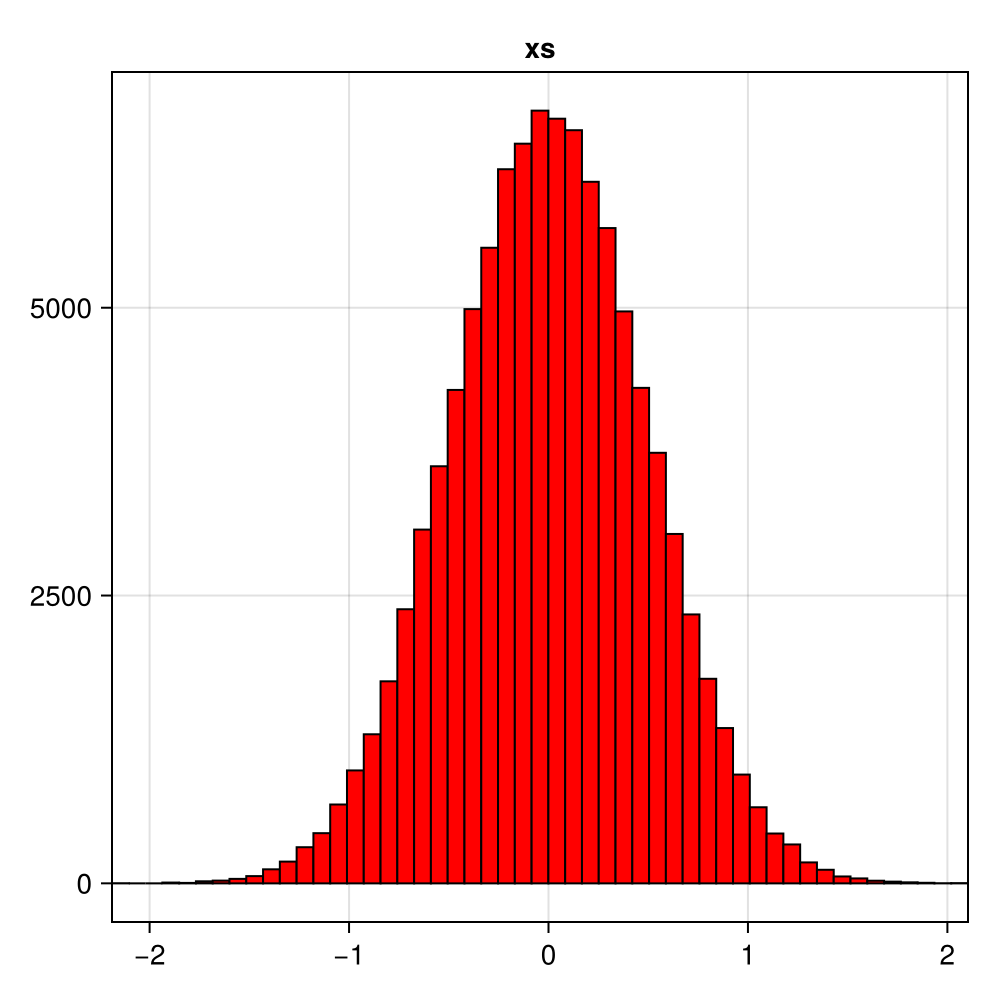

In [4]:
f = Figure(size = (500, 500))
bin_number = 51
xs = [e[1] for e in output.states]
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((minimum(xs), maximum(xs)), nothing),))
f